# Project:  No-show Appointments Dataset


## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

This dataset collects information from 100k medical appointments in Brazil and is focused on the question of whether or not patients show up for their appointment. A number of characteristics about the patient are included in each row.


- ‘ScheduledDay’ tells us on what day the patient set up their appointment.
- ‘Neighborhood’ indicates the location of the hospital.
- ‘Scholarship’ indicates whether or not the patient is enrolled in Brasilian welfare program Bolsa Família.
- Be careful about the encoding of the last column: it says ‘No’ if the patient showed up to their appointment, and ‘Yes’ if they did not show up.

***Goal***
- What factors are important for us to know in order to predict if a patient will show up for their scheduled appointment?


#### Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import rcParams
import seaborn as sb
from sqlalchemy import create_engine 
%matplotlib inline
sb.set_theme()

<a id='wrangling'></a>
## Data Wrangling


### General Properties

In [2]:
data = pd.read_csv('noshowappointments-kagglev2-may-2016.csv')
data.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


In [3]:
df = data.copy()
df.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


In [4]:
df.shape

(110527, 14)

In [5]:
df.describe()

,PatientId,AppointmentID,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received
count,1.105270e+05,1.105270e+05,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000
mean,1.474963e+14,5.675305e+06,37.088874,0.098266,0.197246,0.071865,0.030400,0.022248,0.321026
std,2.560949e+14,7.129575e+04,23.110205,0.297675,0.397921,0.258265,0.171686,0.161543,0.466873
min,3.921784e+04,5.030230e+06,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.172614e+12,5.640286e+06,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.173184e+13,5.680573e+06,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,9.439172e+13,5.725524e+06,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,9.999816e+14,5.790484e+06,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   PatientId       110527 non-null  float64
 1   AppointmentID   110527 non-null  int64  
 2   Gender          110527 non-null  object 
 3   ScheduledDay    110527 non-null  object 
 4   AppointmentDay  110527 non-null  object 
 5   Age             110527 non-null  int64  
 6   Neighbourhood   110527 non-null  object 
 7   Scholarship     110527 non-null  int64  
 8   Hipertension    110527 non-null  int64  
 9   Diabetes        110527 non-null  int64  
 10  Alcoholism      110527 non-null  int64  
 11  Handcap         110527 non-null  int64  
 12  SMS_received    110527 non-null  int64  
 13  No-show         110527 non-null  object 
dtypes: float64(1), int64(8), object(5)
memory usage: 9.7+ MB


In [7]:
df.nunique()

PatientId          62299
AppointmentID     110527
Gender                 2
ScheduledDay      103549
AppointmentDay        27
Age                  104
Neighbourhood         81
Scholarship            2
Hipertension           2
Diabetes               2
Alcoholism             2
Handcap                5
SMS_received           2
No-show                2
dtype: int64

In [8]:
df['Handcap'].unique()

array([0, 1, 2, 3, 4], dtype=int64)

In [9]:
df.duplicated().sum()

0

In [10]:
df['Age'].unique()

array([ 62,  56,   8,  76,  23,  39,  21,  19,  30,  29,  22,  28,  54,
        15,  50,  40,  46,   4,  13,  65,  45,  51,  32,  12,  61,  38,
        79,  18,  63,  64,  85,  59,  55,  71,  49,  78,  31,  58,  27,
         6,   2,  11,   7,   0,   3,   1,  69,  68,  60,  67,  36,  10,
        35,  20,  26,  34,  33,  16,  42,   5,  47,  17,  41,  44,  37,
        24,  66,  77,  81,  70,  53,  75,  73,  52,  74,  43,  89,  57,
        14,   9,  48,  83,  72,  25,  80,  87,  88,  84,  82,  90,  94,
        86,  91,  98,  92,  96,  93,  95,  97, 102, 115, 100,  99,  -1],
      dtype=int64)

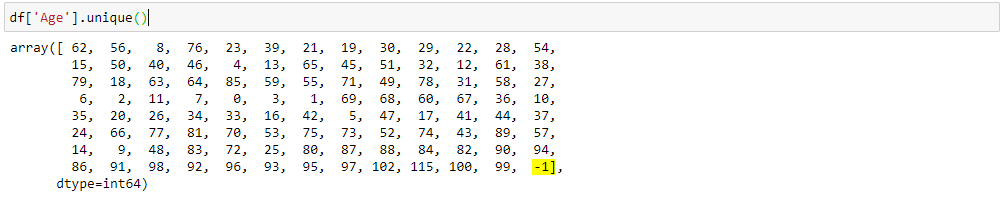

Age can not be -1

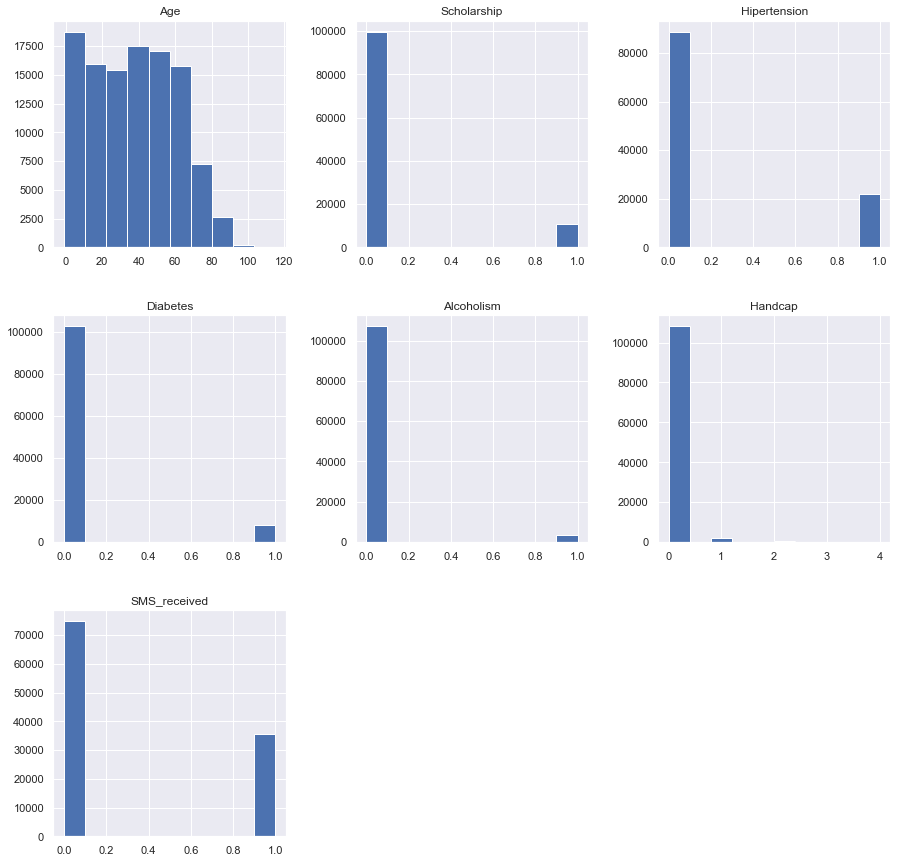

In [11]:
df.drop(['PatientId', 'AppointmentID'], axis=1).hist(figsize=(15,15));

### Data Cleaning

Here I will clean the dataset and try to make columns more understandable for reader

- Removing 'Age' outliers
- Recorrect Columns Names (Hipertension, Handcap, Scholarship, Diabetes, Neighborhood, No-show) to (Has Hypertension, Handicap Level, Family Allowance, Has Diabetes, Hospital Location, Attendance)
- Convert columns (ScheduledDay, AppointmentDay) into datetime.
- Drop Columns (PatientId, AppointmentID)
- Rename Genders

#### Removing 'Age' Outliers

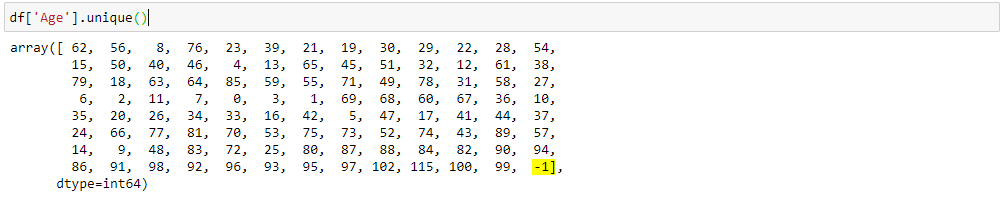

Age can not be -1

In [12]:
df.drop(df.index[df['Age'] < 0], inplace=True)

In [13]:
df.shape

(110526, 14)

In [14]:
df[df['Age'] < 0]

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show


#### Dropping Non-necessary Columns

In [15]:
df.drop(['PatientId', 'AppointmentID'], axis=1, inplace=True)

In [16]:
df.columns

Index(['Gender', 'ScheduledDay', 'AppointmentDay', 'Age', 'Neighbourhood',
       'Scholarship', 'Hipertension', 'Diabetes', 'Alcoholism', 'Handcap',
       'SMS_received', 'No-show'],
      dtype='object')

#### Correcting Columns' Names

In [17]:
df.columns = ['Gender', 'ScheduledDay', 'AppointmentDay', 'Age', 'Hospital Location',
       'Family Allowance', 'Has Hypertension', 'Has Diabetes', 'Alcoholism', 'Handicap Level',
       'SMS_received', 'Attendance']

In [18]:
df.columns

Index(['Gender', 'ScheduledDay', 'AppointmentDay', 'Age', 'Hospital Location',
       'Family Allowance', 'Has Hypertension', 'Has Diabetes', 'Alcoholism',
       'Handicap Level', 'SMS_received', 'Attendance'],
      dtype='object')

#### Renaming Gender Categories

In [19]:
df.loc[df['Gender'] == 'F', 'Gender'] = 'Female'
df.loc[df['Gender'] == 'M', 'Gender'] = 'Male'

In [20]:
df['Gender'].value_counts()

Female    71839
Male      38687
Name: Gender, dtype: int64

#### Renaming Attendance Categories

In [21]:
df.loc[df['Attendance'] == 'No', 'Attendance'] = 'Attended'
df.loc[df['Attendance'] == 'Yes', 'Attendance'] = 'Missed Appointment'

In [22]:
df['Attendance'].value_counts()

Attended              88207
Missed Appointment    22319
Name: Attendance, dtype: int64

#### Converting columns (ScheduledDay, AppointmentDay) into datetime

In [23]:
df['ScheduledDay'] = pd.to_datetime(df['ScheduledDay'])
df['AppointmentDay'] = pd.to_datetime(df['AppointmentDay'])

 #### Extracting day name from 'AppointmentDay)' column

In [24]:
df['Appointment_WeekDay'] = df['AppointmentDay'].dt.day_name()

In [25]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 110526 entries, 0 to 110526
Data columns (total 13 columns):
 #   Column               Non-Null Count   Dtype              
---  ------               --------------   -----              
 0   Gender               110526 non-null  object             
 1   ScheduledDay         110526 non-null  datetime64[ns, UTC]
 2   AppointmentDay       110526 non-null  datetime64[ns, UTC]
 3   Age                  110526 non-null  int64              
 4   Hospital Location    110526 non-null  object             
 5   Family Allowance     110526 non-null  int64              
 6   Has Hypertension     110526 non-null  int64              
 7   Has Diabetes         110526 non-null  int64              
 8   Alcoholism           110526 non-null  int64              
 9   Handicap Level       110526 non-null  int64              
 10  SMS_received         110526 non-null  int64              
 11  Attendance           110526 non-null  object             
 12  Ap

In [26]:
df.head()

,Gender,ScheduledDay,AppointmentDay,Age,Hospital Location,Family Allowance,Has Hypertension,Has Diabetes,Alcoholism,Handicap Level,SMS_received,Attendance,Appointment_WeekDay
0,Female,2016-04-29 18:38:08+00:00,2016-04-29 00:00:00+00:00,62,JARDIM DA PENHA,0,1,0,0,0,0,Attended,Friday
1,Male,2016-04-29 16:08:27+00:00,2016-04-29 00:00:00+00:00,56,JARDIM DA PENHA,0,0,0,0,0,0,Attended,Friday
2,Female,2016-04-29 16:19:04+00:00,2016-04-29 00:00:00+00:00,62,MATA DA PRAIA,0,0,0,0,0,0,Attended,Friday
3,Female,2016-04-29 17:29:31+00:00,2016-04-29 00:00:00+00:00,8,PONTAL DE CAMBURI,0,0,0,0,0,0,Attended,Friday
4,Female,2016-04-29 16:07:23+00:00,2016-04-29 00:00:00+00:00,56,JARDIM DA PENHA,0,1,1,0,0,0,Attended,Friday


<a id='eda'></a>
## Exploratory Data Analysis


**The analysis is structured as partitions, each part will focus on one independent variable with one or more dependent variables, and discuss their relation and how the first one affect the other.**

**The structure as followes:**
1. Attendance Analysis
2. SMS_recieved and relation to Attendance
3. Hospital Location and Affect on Attendance
4. Age & Gender of Patients and relation to Attendance
5. Family Allowance and relation to Attendance
6. Hypertension, Diabetes, Alcoholism, and Handicap Level and relation to Attendance

**Analysis Qustions**

<b>1. Attendance Analysis</b>

   - What is the percentage of Attendance?
   - How do weekdays and weekends affect attendance rates (Bussiness days & Weekends)?
    
<b>2. SMS_recieved and relation to Attendance</b>

   - Does SMS affect patients' attendance?
    
<b>3. Hospital Location and Affect on Attendance</b>

   - Does hospital location affect attendance?
    
<b>4. Age & Gender of Patients and relation to Attendance</b>

   - Is age a major factor in determining the patient's attendance?
    
   - What is the Highest Gender of Patients?
   - Does the patient’s gender have an effect on his attendance؟, for example are males attending less than females, since they are the most responsible and working group?
    
<b>5. Family Allowance and relation to Attendance</b>

   - How does family health insurance affect attendance?
    
<b>6. Hypertension, Diabetes, Alcoholism, and Handicap Level and relation to Attendance</b>

   - What is the effect of some chronic diseases on the attendance of patients? Do people with these diseases have more interest to attend?
    
<b>7. Conclusion</b>

   - What factors are important for us to know in order to predict if a patient will show up for their scheduled appointment?
    

#### Setting up some Visualizations Characterstics

In [27]:
font_size1 = 16
font_size2 = 12

# Setting up figure sizes
rcParams['figure.figsize'] = 15,6
colors=['#4c72b0','#d44e52']

In [28]:
def Add_Percentage(data, groupby, count_of, x1,x2,y1,y2,decimals, shape):
    '''
        This function calculates the percantage of the data provided, 
        and add them to the graphs to be easier to follow and understand.
    '''
    
    Sum = data.groupby(groupby)[count_of].value_counts().sum()
    
    if shape=='v':
        for num, value in enumerate(data.groupby([groupby,count_of]).size().reset_index(name='Count')['Count']):
            if num==0 or num%2==0:
                plt.text(num/2-x1, value+y1, str(np.round(value/Sum*100, decimals = decimals))+'%', fontweight='bold',  ha='center');
            else:
                plt.text(num/2-x2, value+y2, str(np.round(value/Sum*100, decimals = decimals))+'%', fontweight='bold',  ha='center');
    
    elif shape=='h':
        for num, value in enumerate(df.groupby([groupby,count_of]).size().reset_index(name='Count')['Count']):
            if num==0 or num%2==0:
                plt.text(value+y1,num/2-x1 , str(np.round(value/Sum*100, decimals = decimals))+'%', fontweight='bold',  ha='center');
            else:
                plt.text(value+y2,num/2-x2, str(np.round(value/Sum*100, decimals = decimals))+'%', fontweight='bold',  ha='center');

In [29]:
df.head()

,Gender,ScheduledDay,AppointmentDay,Age,Hospital Location,Family Allowance,Has Hypertension,Has Diabetes,Alcoholism,Handicap Level,SMS_received,Attendance,Appointment_WeekDay
0,Female,2016-04-29 18:38:08+00:00,2016-04-29 00:00:00+00:00,62,JARDIM DA PENHA,0,1,0,0,0,0,Attended,Friday
1,Male,2016-04-29 16:08:27+00:00,2016-04-29 00:00:00+00:00,56,JARDIM DA PENHA,0,0,0,0,0,0,Attended,Friday
2,Female,2016-04-29 16:19:04+00:00,2016-04-29 00:00:00+00:00,62,MATA DA PRAIA,0,0,0,0,0,0,Attended,Friday
3,Female,2016-04-29 17:29:31+00:00,2016-04-29 00:00:00+00:00,8,PONTAL DE CAMBURI,0,0,0,0,0,0,Attended,Friday
4,Female,2016-04-29 16:07:23+00:00,2016-04-29 00:00:00+00:00,56,JARDIM DA PENHA,0,1,1,0,0,0,Attended,Friday


### Attendance Analysis

### What is the percentage of Attendance?

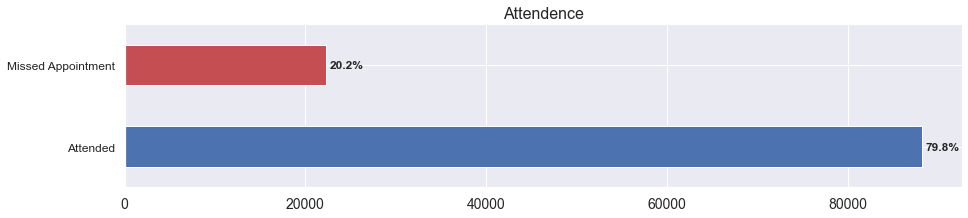

In [30]:
df['Attendance'].value_counts().plot(kind='barh', figsize=(15,3), color=['b','r']);
plt.title('Attendence', fontsize=font_size1);
plt.xticks(fontsize= font_size2+2, rotation='horizontal');
plt.yticks(fontsize= font_size2)
plt.ylabel('')

Sum = df['Attendance'].value_counts().sum()
for num, value in enumerate(df['Attendance'].value_counts()):
    plt.text(value+400,num,str(np.round(value/Sum*100, decimals = 1))+'%', fontweight='bold',va='center');

**The attendance rate is approximately 80% out of more than 100,000, and the rate of absence from the medical examination appointment is 20%, which is due to the patient's personal life from work and other reasons.**

### How do weekdays and weekends affect attendance rates (Bussiness days & Weekends)?

In [31]:
order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
df['Appointment_WeekDay'] = pd.Categorical(df['Appointment_WeekDay'], categories=order, ordered=True)
df = df.sort_values('Appointment_WeekDay')

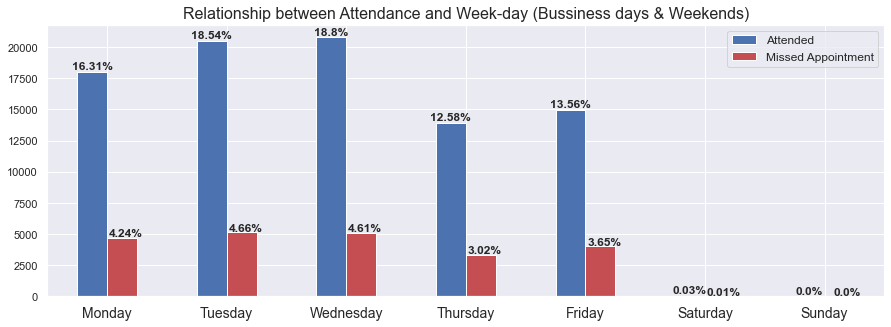

In [32]:
Day_Attendnace = df.groupby(['Appointment_WeekDay','Attendance']).size().reset_index(name='Count')
Day_Attendnace = Day_Attendnace.pivot(index='Appointment_WeekDay',columns='Attendance',values='Count')
Day_Attendnace.plot(kind='bar', figsize=(15,5), color=['b','r']);

plt.xlabel('');
plt.title('Relationship between Attendance and Week-day (Bussiness days & Weekends)', fontsize=font_size1);
plt.xticks(fontsize= font_size2+2, rotation='horizontal');
plt.legend(['Attended', 'Missed Appointment'],fontsize= font_size2);

Sum = df.groupby(['Attendance'])['Appointment_WeekDay'].value_counts().sum()
for num, value in enumerate(df.groupby(['Appointment_WeekDay','Attendance']).size().reset_index(name='Count')['Count']):
    if num==0 or num%2==0:
        plt.text(num/2-0.125, value+200, str(np.round(value/Sum*100, decimals = 2))+'%', fontweight='bold',  ha='center');
    else:
        plt.text(num/2-0.2, value+100, str(np.round(value/Sum*100, decimals = 2))+'%', fontweight='bold',  ha='right');

**It is clear that most hospitals do not operate on weekends, which concentrates more than 99.95% of attendance on weekly working days. The most days in terms of the number of attendees are the second and third days (Tuesday and Wednesday), where approximately 38% of the total attendance rate.**

===================================================================================================================

### SMS Analysis

### Does SMS affect patients' attendance?

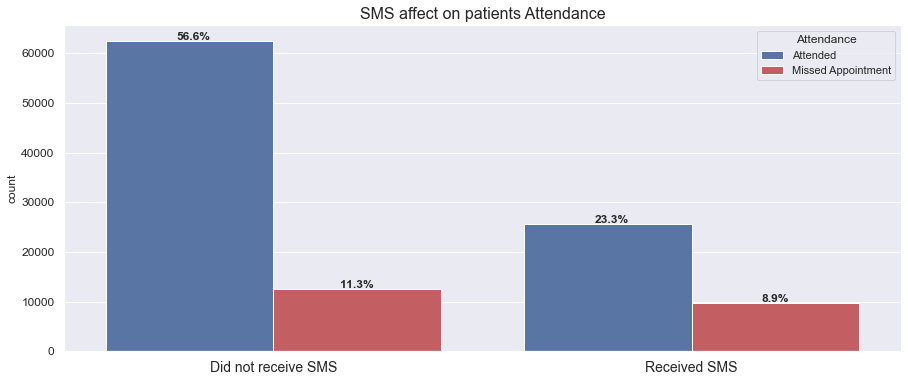

In [33]:
sb.countplot(data=df,x='SMS_received', hue='Attendance',palette=colors);
x_ticks = ['Did not receive SMS', 'Received SMS']
plt.xlabel('');
plt.title('SMS affect on patients Attendance', fontsize=font_size1);
plt.xticks(fontsize= font_size2+2, rotation='horizontal', ticks=[0,1], labels=x_ticks);
plt.yticks(fontsize= font_size2);

Add_Percentage(df, 'SMS_received', 'Attendance', 0.19,0.3,200,200,1,'v')

**The percentage of text message recipients before the appointment is 32.2%, and the attendance rate is 72% of the message recipients. To determine whether text messages affect attendance, we need more information, for example, attendance rate before and after the implementation of this system.**

===================================================================================================================

### Age & Gender Analysis

### Age Analysis

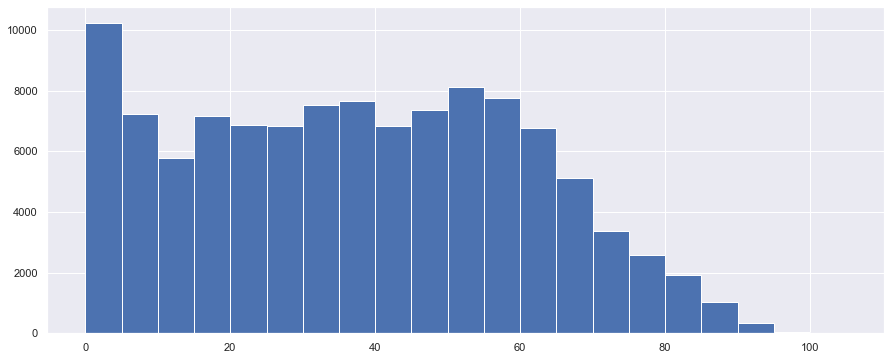

In [34]:
bins = np.arange(0,100+10,5)
plt.hist(data = df, x='Age', bins=bins);

### Is age a major factor in determining the patient's attendance?

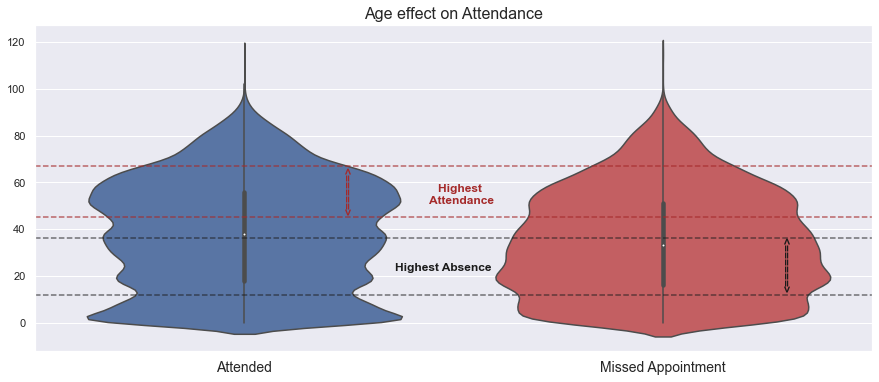

In [35]:
sb.violinplot(data=df,y='Age', x='Attendance',palette=colors);

plt.title('Age effect on Attendance', fontsize=font_size1);
plt.ylabel('');
plt.xlabel('');
plt.xticks(fontsize= font_size2+2);

# Highest Absence Annotations
plt.axhline(12, color='#1b1b1b', ls='--', alpha = 0.6);
plt.axhline(36, color='#1b1b1b', ls='--', alpha = 0.6);
plt.text(0.48, 22, "Highest Absence ", ha='center',fontweight='bold',fontsize= font_size2, color='#1b1b1b')
plt.text(1.3, 14, "<======>", rotation=90, ha='center',fontweight='bold',fontsize= font_size2, color='#1b1b1b');

# Highest Attendance Annotations
plt.axhline(45, color='brown', ls='--', alpha = 0.7);
plt.axhline(67, color='brown', ls='--', alpha = 0.7);
plt.text(0.52, 51, "Highest \nAttendance", ha='center',fontweight='bold',fontsize= font_size2, color='brown')
plt.text(0.25, 47, "<=====>", rotation=90, ha='center',fontweight='bold',fontsize= font_size2, color='brown');

**The age of the patient mainly affects the attendance rate, as the older the patient, the more health care he needs. From the graph, it is clear that the attendance rate increases between the ages of 45 and 65, and the attendance rate decreases dramatically in adolescents and young adults from 12 to 40 years old.**

### Gender Analysis

### What is the Highest Gender of Patients?

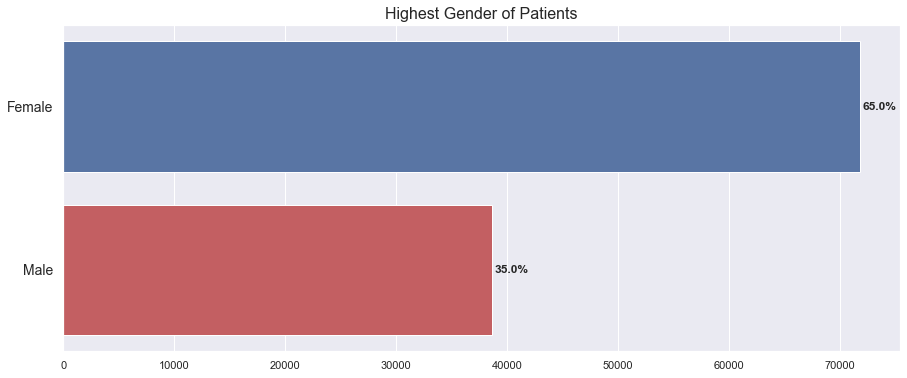

In [36]:
sb.countplot(data=df, y='Gender', palette=colors)

plt.xlabel('');
plt.ylabel('');
plt.title('Highest Gender of Patients', fontsize=font_size1);
plt.yticks(fontsize= font_size2+2);

Sum = df['Gender'].value_counts().sum()
for num, value in enumerate(df['Gender'].value_counts()):
    plt.text(value+200,num,str(np.round(value/Sum*100, decimals = 1))+'%', fontweight='bold',va='center');

### Does the patient’s gender have an effect on his attendance?, for example are males attending less than females, since they are the most responsible and working group?

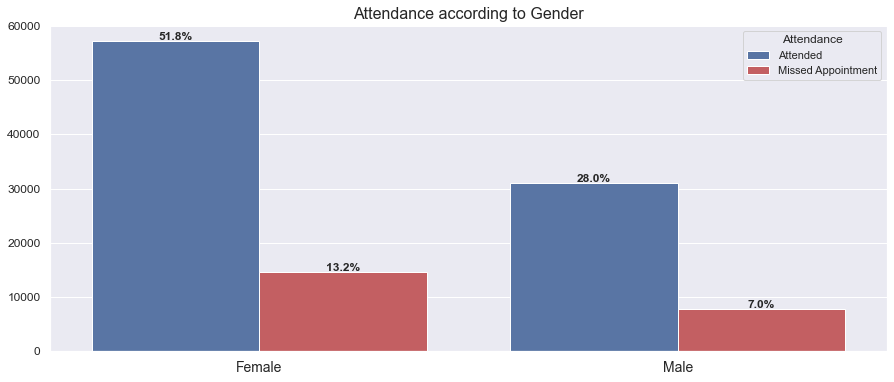

In [37]:
sb.countplot(data=df,x='Gender', hue='Attendance',palette=colors);

plt.xlabel('');
plt.ylabel('');
plt.title('Attendance according to Gender', fontsize=font_size1);
plt.xticks(fontsize= font_size2+2);
plt.yticks(fontsize= font_size2);

Add_Percentage(df, 'Gender', 'Attendance', 0.2, 0.3, 200, 200, 1,'v')

**The attendance rate for males is 80% as well for females, and thus there is no attendance rate for both genders.**

### Age, Gender, and Attendence

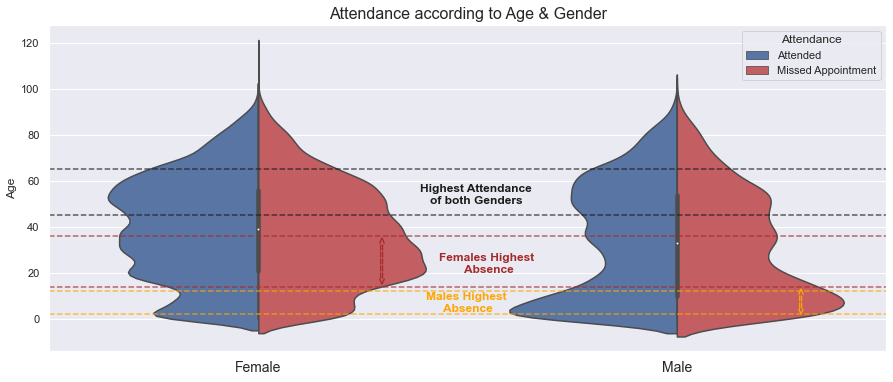

In [38]:
sb.violinplot(data=df,y='Age', x='Gender', hue='Attendance', palette=colors, split=True);

plt.title('Attendance according to Age & Gender', fontsize=font_size1);
plt.xticks(fontsize= font_size2+2);
plt.xlabel('');

# Females Highest Absence
plt.axhline(14, color='brown', ls='--', alpha = 0.7);
plt.axhline(36, color='brown', ls='--', alpha = 0.7);
plt.text(0.55, 20, "Females Highest \nAbsence", ha='center',fontweight='bold',fontsize= font_size2, color='brown');
plt.text(0.3, 16, "<=====>", rotation=90, ha='center',fontweight='bold',fontsize= font_size2, color='brown');

# Males Highest Absence
plt.axhline(2, color='orange', ls='--', alpha = 0.7);
plt.axhline(12, color='orange', ls='--', alpha = 0.7);
plt.text(0.5, 3, "Males Highest \nAbsence", ha='center',fontweight='bold',fontsize= font_size2, color='orange');
plt.text(1.3, 3, "<==>", rotation=90, ha='center',fontweight='bold',fontsize= font_size2, color='orange');

# Females & Males Highest Attendance
plt.axhline(45, color='#1b1b1b', ls='--', alpha = 0.7);
plt.axhline(65, color='#1b1b1b', ls='--', alpha = 0.7);
plt.text(0.52, 50, "Highest Attendance\nof both Genders", ha='center',fontweight='bold',fontsize= font_size2, color='#1b1b1b');

**The largest number of male absenteeism occurs in childhood between 2 and 12 years old. As for females, it is between 14 and 36 years old, and the largest attendance of both genders is between 45 and 65, as we explained before.**

===================================================================================================================

### Family Allowance Analysis

### How does family health insurance affect attendance (Bosla Familia)?

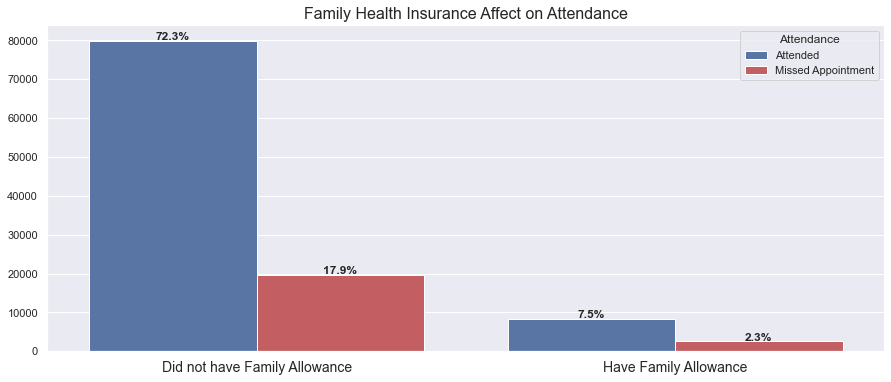

In [39]:
sb.countplot(data=df,x='Family Allowance', hue='Attendance',palette=colors);

plt.xlabel('');
plt.ylabel('');
plt.title('Family Health Insurance Affect on Attendance', fontsize=font_size1);
plt.xticks(fontsize= font_size2+2);
x_ticks = ['Did not have Family Allowance', 'Have Family Allowance']
plt.xticks(fontsize= font_size2+2, rotation='horizontal', ticks=[0,1], labels=x_ticks);

Add_Percentage(df, 'Family Allowance', 'Attendance', 0.2, 0.3, 200, 200, 1,'v')

**As shown, only 10% of patients have family health insurance, approximately one person out of 10 people, and the attendance rate is 70%, or nearly 7 people out of every 10 people have insurance and attend.**

### Bosla Familia, Age, and Attendance

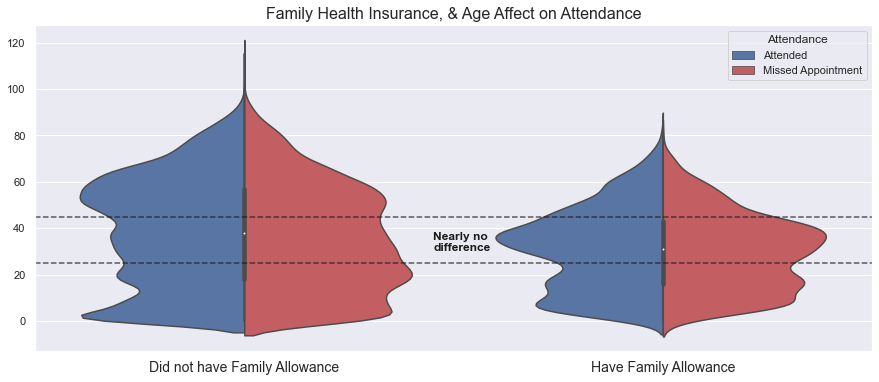

In [40]:
sb.violinplot(data = df, x='Family Allowance', y ='Age', hue='Attendance', split=True,palette=colors);

plt.xlabel('');
plt.ylabel('');
plt.title('Family Health Insurance, & Age Affect on Attendance', fontsize=font_size1);
plt.xticks(fontsize= font_size2+2);
x_ticks = ['Did not have Family Allowance', 'Have Family Allowance']
plt.xticks(fontsize= font_size2+2, rotation='horizontal', ticks=[0,1], labels=x_ticks);

# Females & Males Highest Attendance
plt.axhline(25, color='#1b1b1b', ls='--', alpha = 0.7);
plt.axhline(45, color='#1b1b1b', ls='--', alpha = 0.7);
plt.text(0.52, 30, "Nearly no \ndifference", ha='center',fontweight='bold',fontsize= font_size2, color='#1b1b1b');

**There is no big difference between attendees and absentees who own insurance, but it is clear that a large percentage of those who have insurance are between the ages of 28 and 42 years old.**

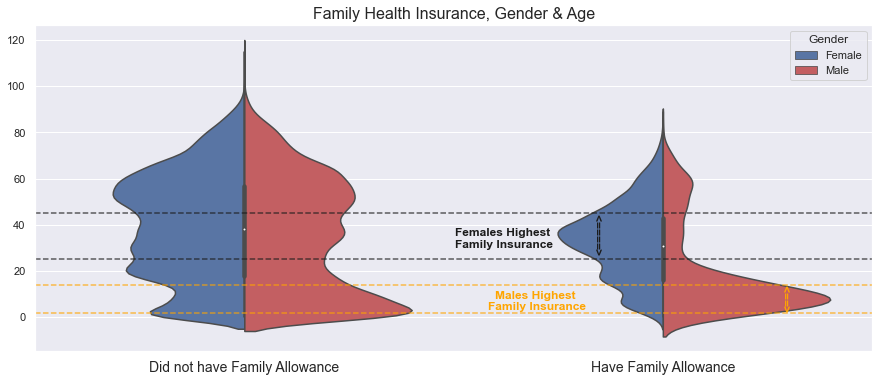

In [41]:
sb.violinplot(data = df, x='Family Allowance', y ='Age', hue='Gender', split=True,palette=colors);

plt.xlabel('');
plt.ylabel('');
plt.title('Family Health Insurance, Gender & Age', fontsize=font_size1);
x_ticks = ['Did not have Family Allowance', 'Have Family Allowance']
plt.xticks(fontsize= font_size2+2, rotation='horizontal', ticks=[0,1], labels=x_ticks);

# Females & Males Highest Attendance
plt.axhline(25, color='#1b1b1b', ls='--', alpha = 0.7);
plt.axhline(45, color='#1b1b1b', ls='--', alpha = 0.7);
plt.text(0.62, 30, "Females Highest \nFamily Insurance", ha='center',fontweight='bold',fontsize= font_size2, color='#1b1b1b');
plt.text(0.85, 28, "<====>", rotation=90, ha='center',fontweight='bold',fontsize= font_size2, color='#1b1b1b');

# Males Highest Absence
plt.axhline(2, color='orange', ls='--', alpha = 0.7);
plt.axhline(14, color='orange', ls='--', alpha = 0.7);
plt.text(0.7, 3, "Males Highest \nFamily Insurance", ha='center',fontweight='bold',fontsize= font_size2, color='orange');
plt.text(1.3, 3, "<==>", rotation=90, ha='center',fontweight='bold',fontsize= font_size2, color='orange');

**In more detail, we find that the largest percentage of males who have insurance are between the ages of 2 and 14 years, and as for females, the largest percentage of them lies between 25 and 45 years.**

### Family Health Insurance & Gender

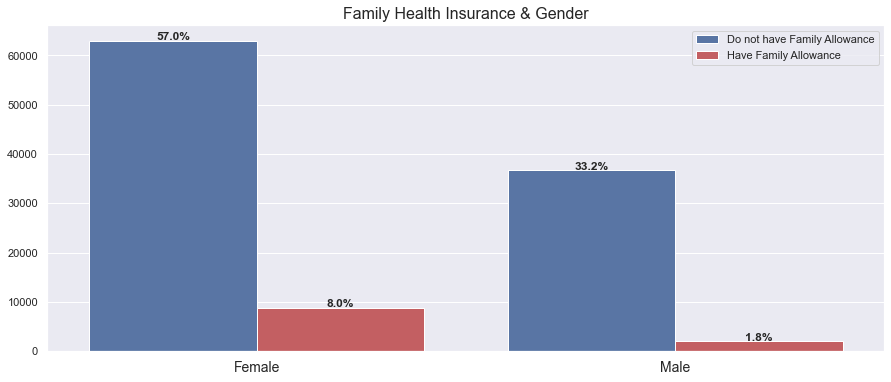

In [42]:
sb.countplot(data=df, x='Gender', hue='Family Allowance', palette=colors);

plt.xlabel('');
plt.ylabel('');
plt.title('Family Health Insurance & Gender', fontsize=font_size1);
plt.xticks(fontsize= font_size2+2, rotation='horizontal');
plt.legend(['Do not have Family Allowance','Have Family Allowance']);

Add_Percentage(df, 'Gender', 'Family Allowance', 0.2, 0.3, 200, 200, 1,'v')

**Here we find that the percentage of males who have health insurance is 5%, compared to 12% of females.**

===================================================================================================================

### Hypertension, Diabetes, Alcoholism, and Handicap Level Analysis

### What is the effect of some chronic diseases on the attendance of patients? Do people with these diseases have more interest to attend?

### Hypertension

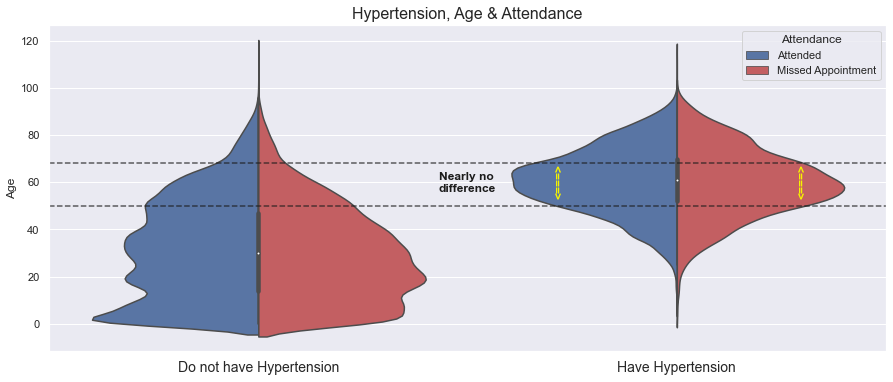

In [43]:
sb.violinplot(data = df, x='Has Hypertension', y ='Age', hue='Attendance', split=True,palette=colors);

plt.xlabel('');
plt.title('Hypertension, Age & Attendance', fontsize=font_size1);
x_ticks = ['Do not have Hypertension', 'Have Hypertension']
plt.xticks(fontsize= font_size2+2, rotation='horizontal', ticks=[0,1], labels=x_ticks);

# Absentees
plt.text(0.72, 54, "<===>", rotation=90, ha='center',fontweight='bold',fontsize= font_size2, color='#f7f400');

# Attendees
plt.text(1.3, 54, "<===>", rotation=90, ha='center',fontweight='bold',fontsize= font_size2, color='#f7f400');

# Measuring Difference between Attendance and Missing the Appointment
plt.axhline(50, color='#1b1b1b', ls='--', alpha = 0.7);
plt.axhline(68, color='#1b1b1b', ls='--', alpha = 0.7);
plt.text(0.5, 56, "Nearly no \ndifference", ha='center',fontweight='bold',fontsize= font_size2, color='#1b1b1b');

**There is no significant difference between the numbers of attendees and absentees for those with hypertension disease, but the largest group lies between the ages of 50 and 68 years.**

### Diabetes

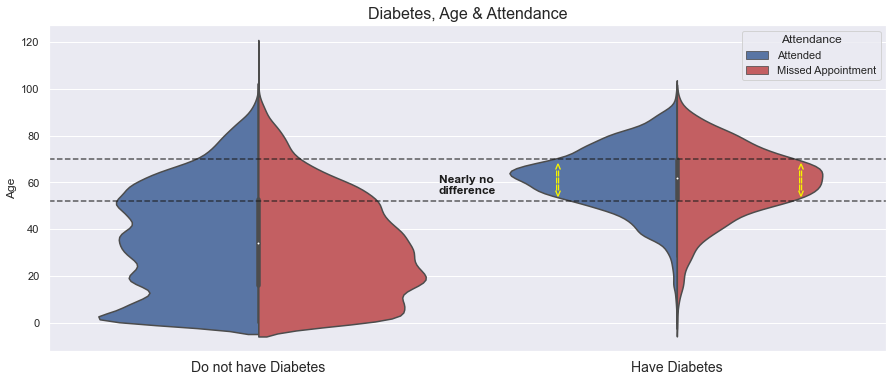

In [44]:
sb.violinplot(data = df, x='Has Diabetes', y ='Age', hue='Attendance', split=True,palette=colors);

plt.xlabel('');
plt.title('Diabetes, Age & Attendance', fontsize=font_size1);
x_ticks = ['Do not have Diabetes', 'Have Diabetes']
plt.xticks(fontsize= font_size2+2, rotation='horizontal', ticks=[0,1], labels=x_ticks);

# Highest Absence
plt.text(0.72, 55, "<===>", rotation=90, ha='center',fontweight='bold',fontsize= font_size2, color='#f7f400');

# Highest Attendance
plt.text(1.3, 55, "<===>", rotation=90, ha='center',fontweight='bold',fontsize= font_size2, color='#f7f400');

# Measuring Difference between Attendance and Missing the Appointment
plt.axhline(52, color='#1b1b1b', ls='--', alpha = 0.7);
plt.axhline(70, color='#1b1b1b', ls='--', alpha = 0.7);
plt.text(0.5, 55, "Nearly no \ndifference", ha='center',fontweight='bold',fontsize= font_size2, color='#1b1b1b');

**There is no significant difference between the numbers of attendees and absentees for those with Diabetes, but the largest group lies between the ages of 50 and 70 years.**

### Alcoholism

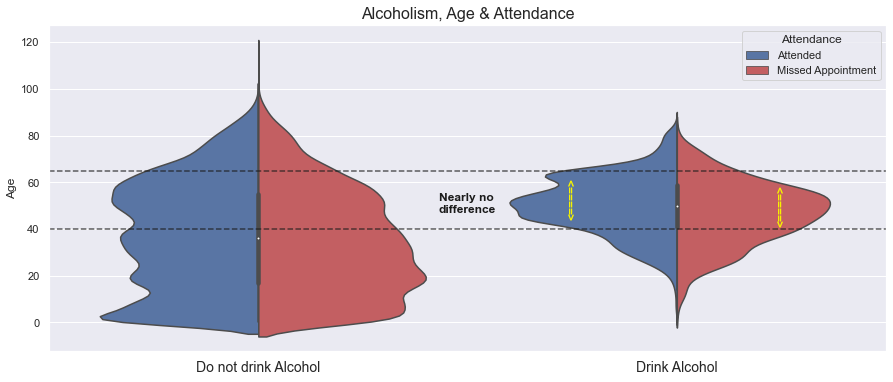

In [45]:
sb.violinplot(data = df, x='Alcoholism', y ='Age', hue='Attendance', split=True,palette=colors);
plt.xlabel('');
plt.title('Alcoholism, Age & Attendance', fontsize=font_size1);
x_ticks = ['Do not drink Alcohol', 'Drink Alcohol']
plt.xticks(fontsize= font_size2+2, rotation='horizontal', ticks=[0,1], labels=x_ticks);

# Highest Absence
plt.text(0.75, 45, "<====>", rotation=90, ha='center',fontweight='bold',fontsize= font_size2, color='#f7f400');

# Highest Attendance
plt.text(1.25, 42, "<====>", rotation=90, ha='center',fontweight='bold',fontsize= font_size2, color='#f7f400');

# Measuring Difference between Attendance and Missing the Appointment
plt.axhline(40, color='#1b1b1b', ls='--', alpha = 0.7);
plt.axhline(65, color='#1b1b1b', ls='--', alpha = 0.7);
plt.text(0.5, 47, "Nearly no \ndifference", ha='center',fontweight='bold',fontsize= font_size2, color='#1b1b1b');

**There is no significant difference between the numbers of attendees and absentees for those who drink alcohols, but the largest group lies between the ages of 40 and 65 years.**

### Handicap Level

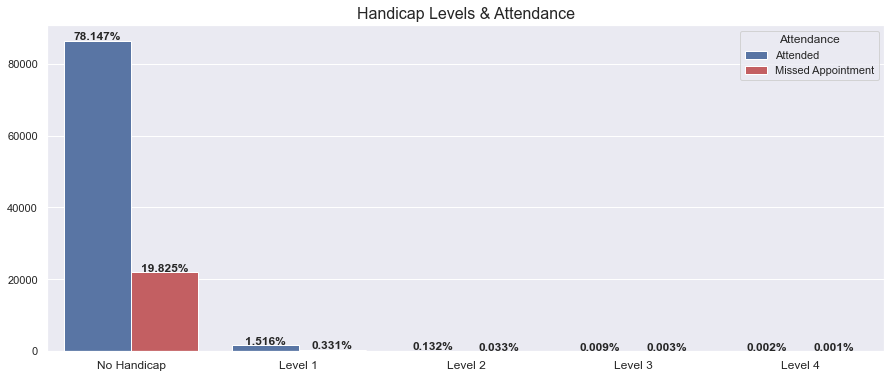

In [46]:
sb.countplot(data=df,x='Handicap Level', hue='Attendance',palette=colors);

plt.xlabel('');
plt.ylabel('');
plt.title('Handicap Levels & Attendance', fontsize=font_size1);
x_ticks = ['No Handicap', 'Level 1', 'Level 2', 'Level 3', 'Level 4']
plt.xticks(fontsize= font_size2, rotation='horizontal', labels=x_ticks, ticks=[0,1,2,3,4]);

Add_Percentage(df, 'Handicap Level', 'Attendance', 0.2, 0.3, 200, 200, 3,'v')

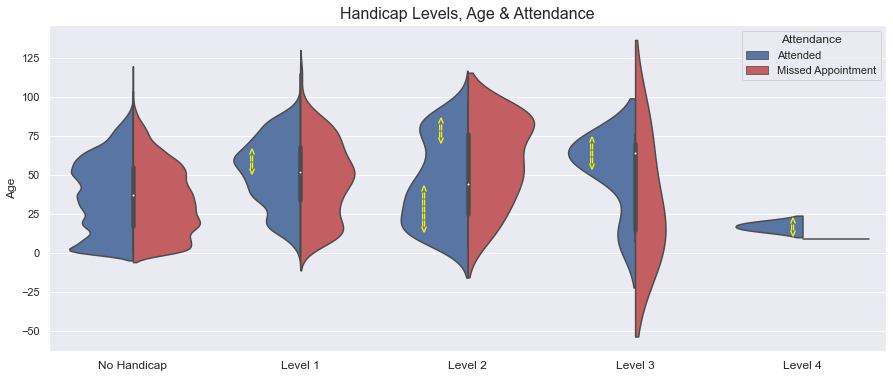

In [47]:
sb.violinplot(data = df, x='Handicap Level', y ='Age', hue='Attendance', split=True,palette=colors);

plt.xlabel('');
plt.title('Handicap Levels, Age & Attendance', fontsize=font_size1);
x_ticks = ['No Handicap', 'Level 1', 'Level 2', 'Level 3', 'Level 4']
plt.xticks(fontsize= font_size2, rotation='horizontal', labels=x_ticks, ticks=[0,1,2,3,4]);

# Highest Absence
plt.text(0.72, 52, "<==>", rotation=90, ha='center',fontweight='bold',fontsize= font_size2, color='#f7f400');

# Highest Attendance
plt.text(1.75, 15, "<=====>", rotation=90, ha='center',fontweight='bold',fontsize= font_size2, color='#f7f400');

# Highest Attendance
plt.text(1.85, 72, "<==>", rotation=90, ha='center',fontweight='bold',fontsize= font_size2, color='#f7f400');

# Highest Attendance
plt.text(2.75, 55, "<===>", rotation=90, ha='center',fontweight='bold',fontsize= font_size2, color='#f7f400');

# Highest Attendance
plt.text(3.95, 12, "<=>", rotation=90, ha='center',fontweight='bold',fontsize= font_size2, color='#f7f400');

- **The graph shows the level of handicap, the ages of its owners, and their attendance rates for each level.**


- **For the first level of handicap, attendance numbers increase between the ages of 50 and 70 years.**


- **As for the second level of handicap, the number of attendance increases in two age groups, the first between 10 and 45 years old and the second between the ages of 70 and 90 years.**


- **The number of attendees for the third level of handicap increases between 50 and 75 years.**


- **As for the fourth and last level, almost all attendance lies between 8 and 25.**


===================================================================================================================

### Location Analysis

### What are the Highest Hospitals has attendancies?

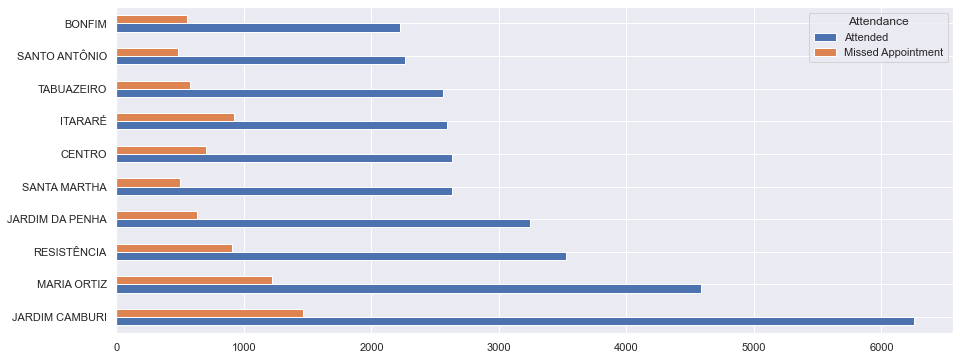

In [48]:
Highest_locations = df.groupby(['Hospital Location','Attendance']).size().reset_index(name='Count').pivot(index='Hospital Location',columns='Attendance',values='Count').nlargest(10, columns=['Attended'])
Highest_locations.plot(kind='barh', figsize=(15,6));
plt.ylabel('');

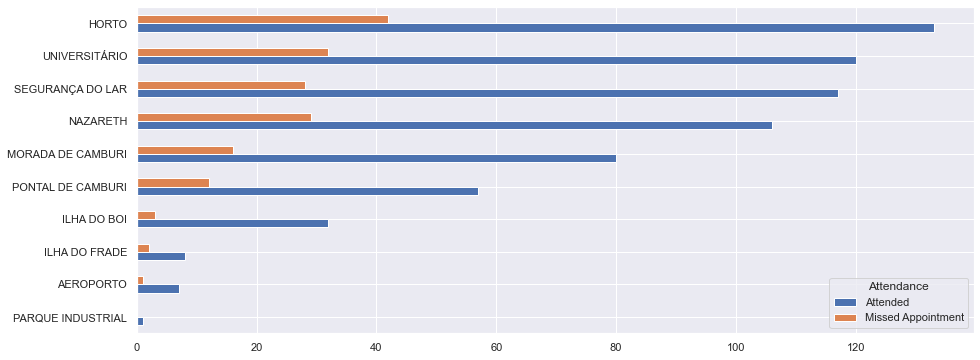

In [49]:
Lowest_locations = df.groupby(['Hospital Location','Attendance']).size().reset_index(name='Count').pivot(index='Hospital Location',columns='Attendance',values='Count').nsmallest(10, columns=['Attended'])
Lowest_locations.plot(kind='barh', figsize=(15,6));
plt.ylabel('');

**Certainly, some hospital sites and their types have an impact on attendance rates, depending on the type of services provided in those hospitals, for example some hospitals may provide more services to females than males, or attendance may depend on the size of the population density in those sites.**

______________________________

<a id='conclusions'></a>
## Conclusions

### What is the percentage of Attendance?

**The attendance rate is approximately 80% out of more than 100,000, and the rate of absence from the medical examination appointment is 20%, which is due to the patient's personal life from work and other reasons.**

### How do weekdays and weekends affect attendance rates (Bussiness days & Weekends)?

**It is clear that most hospitals do not operate on weekends, which concentrates more than 99.95% of attendance on weekly working days. The most days in terms of the number of attendees are the second and third days (Tuesday and Wednesday), where approximately 38% of the total attendance rate.**

===================================================================================================================

### SMS Analysis

### Does SMS affect patients' attendance?

**The percentage of SMS recipients before the appointment is 32.2%, and the attendance rate is 72% of the SMS recipients. To determine whether SMS affect attendance, we need more information, for example, attendance rate before and after the implementation of this system.**

===================================================================================================================

### Age & Gender Analysis

### Age Analysis

### Is age a major factor in determining the patient's attendance?

**The age of the patient mainly affects the attendance rate, as the older the patient, the more health care he needs. From the graph, it is clear that the attendance rate increases between the ages of 45 and 65, and the attendance rate decreases dramatically in adolescents and young adults from 12 to 40 years old.**

### Gender Analysis

### What is the Highest Gender of Patients?

**Females**

### Does the patient’s gender have an effect on his attendance?, for example are males attending less than females, since they are the most responsible and working group?

**The attendance rate for males is 80% as well for females, and thus there is no attendance rate for both genders.**

### Age, Gender, and Attendence

**The largest number of male absenteeism occurs in childhood between 2 and 12 years old. As for females, it is between 14 and 36 years old, and the largest attendance of both genders is between 45 and 65, as we explained before.**

===================================================================================================================

### Family Allowance Analysis

### How does family health insurance affect attendance (Bosla Familia)?

**As shown, only 10% of patients have family health insurance, approximately one person out of 10 people, and the attendance rate is 70%, or nearly 7 people out of every 10 people have insurance and attend.**

### Bosla Familia, Age, and Attendance

**There is no big difference between attendees and absentees who own insurance, but it is clear that a large percentage of those who have insurance are between the ages of 28 and 42 years old.**

**In more detail, we find that the largest percentage of males who have insurance are between the ages of 2 and 14 years, and as for females, the largest percentage of them lies between 25 and 45 years.**

### Family Health Insurance & Gender

**Here we find that the percentage of males who have health insurance is 5%, compared to 12% of females.**

===================================================================================================================

### Hypertension, Diabetes, Alcoholism, and Handicap Level Analysis

### What is the effect of some chronic diseases on the attendance of patients? Do people with these diseases have more interest to attend?

### Hypertension

**There is no significant difference between the numbers of attendees and absentees for those with hypertension disease, but the largest group lies between the ages of 50 and 68 years.**

### Diabetes

**There is no significant difference between the numbers of attendees and absentees for those with Diabetes, but the largest group lies between the ages of 50 and 70 years.**

### Alcoholism

**There is no significant difference between the numbers of attendees and absentees for those who drink alcohols, but the largest group lies between the ages of 40 and 65 years.**

### Handicap Level

- **The graph shows the level of handicap, the ages of its owners, and their attendance rates for each level.**


- **For the first level of handicap, attendance numbers increase between the ages of 50 and 70 years.**


- **As for the second level of handicap, the number of attendance increases in two age groups, the first between 10 and 45 years old and the second between the ages of 70 and 90 years.**


- **The number of attendees for the third level of handicap increases between 50 and 75 years.**


- **As for the fourth and last level, almost all attendance lies between 8 and 25.**


===================================================================================================================

### What are the Highest Hospitals has attendancies?

**Certainly, some hospital sites and their types have an impact on attendance rates, depending on the type of services provided in those hospitals, for example some hospitals may provide more services to females than males, or attendance may depend on the size of the population density in those sites.**

===================================================================================================================

### Limitations

**I think there are parts that need more information and analysis, such as SMS, as it can be a factor affecting attendance, but there is not enough information to measure the extent of the difference before and after the application of the SMS system.**

**Also with regard to hospital sites, if the postal code was provided for each location, it would have been easy to analyze hospital sites and attendance numbers, and it would have facilitated the conclusion of the reasons affecting attendance rates.**

===================================================================================================================

### What factors are important for us to know in order to predict if a patient will show up for their scheduled appointment?

<b>
Factors affecting attendance rate may differ depending on the patient's condition and other external reasons that may not be mentioned.

But from the previous conclusion, one of the factors that have a clear impact is the age of the patient, as the older he gets, he needs better health care that cannot be provided at home and needs under constant monitoring.

And also one of the influencing factors is the level of handicap, which varies from one level to another, but in certain age periods the patient needs more care, especially in the fourth level, where most of them attended.

Certainly, some hospital sites and their types have an impact on attendance rates, depending on the type of services provided in those hospitals, for example some hospitals may provide more services to females than males, or attendance may depend on the size of the population density in those sites.
</b>

_________________

## Submitting your Project 

> Before you submit your project, you need to create a .html or .pdf version of this notebook in the workspace here. To do that, run the code cell below. If it worked correctly, you should get a return code of 0, and you should see the generated .html file in the workspace directory (click on the orange Jupyter icon in the upper left).

> Alternatively, you can download this report as .html via the **File** > **Download as** submenu, and then manually upload it into the workspace directory by clicking on the orange Jupyter icon in the upper left, then using the Upload button.

> Once you've done this, you can submit your project by clicking on the "Submit Project" button in the lower right here. This will create and submit a zip file with this .ipynb doc and the .html or .pdf version you created. Congratulations!